Source: http://wartburg.biostr.washington.edu/loc/course/artiphys/index.html

In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import handytools.navigator as nav
from spectools.metrics.metrics import fvmax, cubic_spline, curvature, angle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
shape_coor = nav.pklload("/src", "data", "stimulus", "shape_coor.pkl")

In [25]:
anchors = np.array(shape_coor[20]).reshape(-1, 2)
pts, dpts = fvmax(anchors)

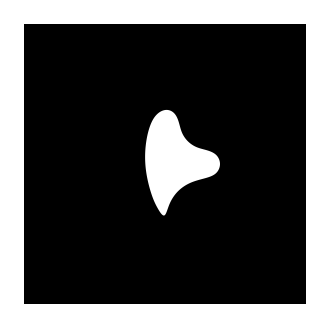

In [26]:
plt.figure(figsize=(4,4))
plt.axis("off")
plt.fill([-4.0, 4.0, 4.0, -4.0],[-4.0, -4.0, 4.0, 4.0], 'k')
plt.fill(*pts.T, 'w')
plt.show()

In [27]:
ps, dps, ddps = cubic_spline(anchors)

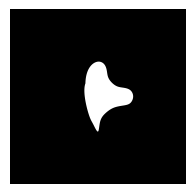

In [28]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(227*px, 227*px))
plt.axis("off")
plt.fill([-10.0, 10.0, 10.0, -10.0],[-10.0, -10.0, 10.0, 10.0], 'k')
plt.fill(*ps.T, 'w')
plt.xlim(-4, 4); plt.ylim(-4, 4)
plt.savefig("/src/data/shapes/test.png")

In [29]:
ks, ts = [], []
for i in range(len(ps)):
    k = curvature(dps[i], ddps[i])
    t = angle(ps[i])
    ks.append(k)
    ts.append(t)

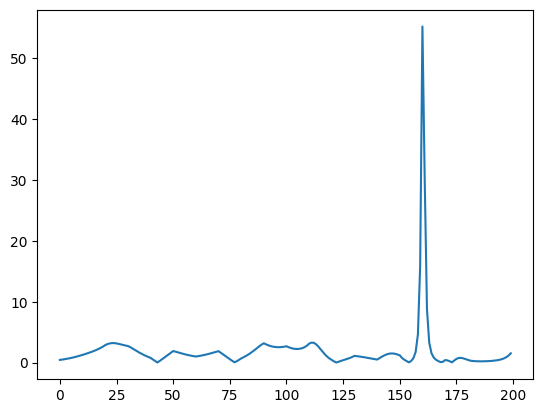

In [30]:
plt.plot(ks)

In [31]:
from PIL import Image

image = Image.open("/src/data/shapes/test.png")
image_array = np.asarray(image)

In [32]:
coors = []
for i in range(227): # middle: 113.5
    for j in range(227):
        vals = image_array[i][j]
        if 0 in vals: coors.append((i, j))
centroid = np.mean(coors, axis=0)
centroid

array([114.16996757, 115.15768408])